# Polynomial Fitting

This notebook allows you to plot data (with y-error bars) and fit to an nth order polynomial.

## Definitions
----
As usual we begin by importing useful libraries and functions.

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Adding your data
----
In the next cell you can enter your X and Y data and uncertainties on the Y values.

In [6]:
raw_data = {
    'I': np.array([0, 0.20, 0.40, 0.60, 0.80, 1, 1.20, 1.40, 1.60, 1.80, 2.00, 2.20, 2.40, 2.60, 2.80, 3.00]),
    'D': np.array([20.75, 20.65, 20.5, 20.4, 20.3, 20.15, 20, 19.9, 19.8, 19.65, 19.55, 19.45, 19.3, 19.25, 19.1, 18.95]),
    'B': np.array([-33.985, -5.054, 22.505, 50.274, 77.097, 105.268, 133.218, 161.168, 189.517, 216.515, 244.369, 268.413, 295.812, 324.120, 350.993, 377.494]),
    'stdB': np.array([1.1, 0.95, 0.96, 0.96, 1, 1.2, 0.96, 0.92, 0.97, 0.97, 1, 0.91, 0.94, 1.1, 1, 0.97]),
    'dt': np.array([6.66183, 6.21785, 4.00840, 4.40682, 5.57795, 2.04042, 7.973, 7.04281, 6.26968, 5.07373, 7.05489, 7.13946, 5.10997, 8.46829, 4.74756, 4.04690]),
}

raw_data['D'] = (raw_data['D'] - max(raw_data['D']))/100
raw_data['B'] /= 1000000
raw_data['stdB'] /= 1000000
raw_data['sI'] = np.array([0.01] * len(raw_data['I']))
raw_data['sD'] = np.array([0.001] * len(raw_data['D']))
raw_data['sB'] = raw_data['stdB']/(np.sqrt(raw_data['dt'] * 80))

data = pd.DataFrame(data=raw_data)

data

,I,D,B,stdB,dt,sI,sD,sB
0,0.0,0.0000,-0.000034,1.100000e-06,6.66183,0.01,0.001,4.764868e-08
1,0.2,-0.0010,-0.000005,9.500000e-07,6.21785,0.01,0.001,4.259499e-08
2,0.4,-0.0025,0.000023,9.600000e-07,4.00840,0.01,0.001,5.360937e-08
3,0.6,-0.0035,0.000050,9.600000e-07,4.40682,0.01,0.001,5.112856e-08
4,0.8,-0.0045,0.000077,1.000000e-06,5.57795,0.01,0.001,4.733885e-08
5,1.0,-0.0060,0.000105,1.200000e-06,2.04042,0.01,0.001,9.392398e-08
6,1.2,-0.0075,0.000133,9.600000e-07,7.97300,0.01,0.001,3.801153e-08
7,1.4,-0.0085,0.000161,9.200000e-07,7.04281,0.01,0.001,3.875876e-08
8,1.6,-0.0095,0.000190,9.700000e-07,6.26968,0.01,0.001,4.331158e-08
9,1.8,-0.0110,0.000217,9.700000e-07,5.07373,0.01,0.001,4.814632e-08


Text(0, 0.5, '$ Displacement \\ (m) $')

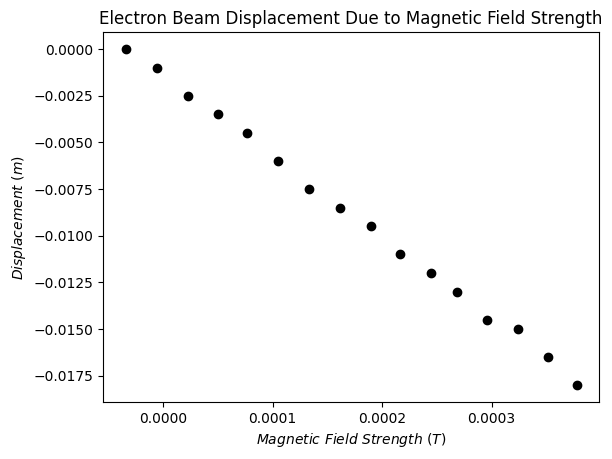

In [10]:
fig = plt.figure() # Create a plot figure called 'fig'.
ax = fig.add_subplot(111) # Define a set of axes called 'ax'.

ax.errorbar(data.loc[:,'B'], data.loc[:,'D'], fmt='ok') #Plot X vs Y using black (k) circles (o)

# Set the title and axes labels for the plot.
ax.set_title('Electron Beam Displacement Due to Magnetic Field Strength')
ax.set_xlabel(r'$Magnetic \ Field \ Strength \ ( T)$')
ax.set_ylabel(r'$ Displacement \ (m) $')

## Fit data to a polynomial
----

The next cell uses the NUMPY Polyfit function to fit your X and Y data to an nth order polynomial.  The code is written assuming a polynomial of order 1 which is a linear function of a straight line.  The returned best fit parameters correspond to the Slope of the line for fit_parameters[0] and the Y Intercept for fit_parameters[1].

In [8]:
X = data.loc[:,'B']**2
sX = X * data.loc[:, 'sB'] * math.sqrt(2)
Y = data.loc[:,'D']**2
sY = Y * data.loc[:,'sD'] * math.sqrt(2)

fit_parameters = np.polyfit(X, Y, deg=1) # Call the fit function sending it your X and Y data and the order of the polynomial.

print("Fit Result:")
try: # Try to compute the uncertainties in the best fit paramaters.
    cov = np.polyfit(X,Y,cov=True, deg=1)[1]
    unc = [np.sqrt(cov[i,i]) for i in range(len(cov))]
    print("Slope = ",fit_parameters[0],"+-",unc[0])
    print("Y-Int = ",fit_parameters[1],"+-",unc[1])
except ValueError:
    print("Slope = ",fit_parameters[0])
    print("Y-Int = ",fit_parameters[1])
    print("Not enough data points to find fit uncertainties")
    
print("Y = {:.3}".format(fit_parameters[0])," * X + {:.3}".format(fit_parameters[1]))   

Fit Result:
Slope =  2196.429662762993 +- 41.170398761661666
Y-Int =  8.720509066570505e-06 +- 2.6756279957102196e-06
Y = 2.2e+03  * X + 8.72e-06


Text(0, 0.5, '$ Displacement \\ Squared \\ (m^2) $')

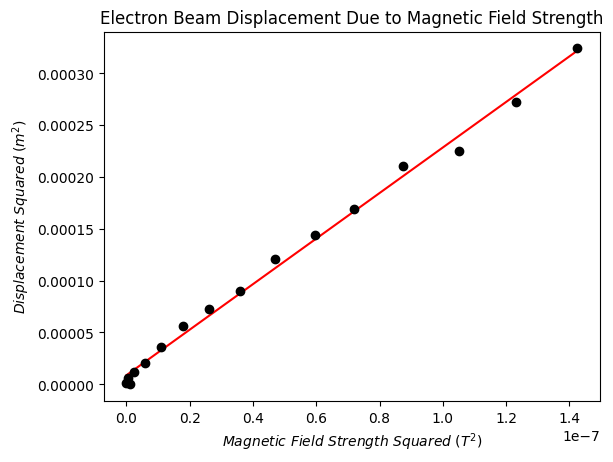

In [9]:
# Use the numpy linspace function to generate 50 evenly spaced x-axis values from 
# the minimum value of the X data to the Maximum value of the X data.

fit_x = np.linspace(min(X), max(X), 50)

# Calculate the the corresponding best fit y values using the best fit paramaters.
fit_y = fit_parameters[0] * fit_x + fit_parameters[1]

fig = plt.figure() # Create a plot figure called 'fig'.
ax = fig.add_subplot(111) # Define a set of axes called 'ax'.

ax.errorbar(X, Y, fmt='ok') 
ax.plot(fit_x, fit_y, '-r') 

# Set the title and axes labels for the plot.
ax.set_title('Electron Beam Displacement Due to Magnetic Field Strength')
ax.set_xlabel(r'$Magnetic \ Field \ Strength \ Squared \ ( T^2)$')
ax.set_ylabel(r'$ Displacement \ Squared \ (m^2) $')